In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
df=pd.read_csv('amazon_india_2018.csv')
df

,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,discounted_price_inr,quantity,subtotal_inr,delivery_charges,final_amount_inr,customer_city,customer_state,customer_tier,customer_spending_tier,customer_age_group,payment_method,delivery_days,delivery_type,is_prime_member,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating
0,TXN_2018_00000001,2018-01-28,CUST_2015_00011381,PROD_000367,Samsung Galaxy S9+ 128GB White,Electronics,Smartphones,Samsung,123828.89,0.00,123828.89,1,123828.89,0.0,123828.89,Delhi,Delhi,Metro,Premium,18-25,COD,3,Standard,False,False,NaN,4.5,Delivered,1,2018,1,0.21,False,3.9
1,TXN_2018_00000002,2018-01-09,CUST_2018_00004073,PROD_001683,Apple Mi Pad 8GB RAM Silver,Electronics,Tablets,Apple,61478.19,0.00,61478.19,1,61478.19,NaN,61478.19,Mumbai,Maharashtra,Metro,Premium,18-25,COD,3,Standard,True,False,NaN,4.0,Delivered,1,2018,1,0.40,True,4.5
2,TXN_2018_00000003,2018-01-06,CUST_2018_00024729,PROD_001688,Apple Slate 8GB RAM Black,Electronics,Tablets,Apple,38624.59,0.00,38624.59,2,77249.18,0.0,77249.18,Kochi,Kerala,Tier2,Standard,26-35,Debit Card,4,Standard,False,False,NaN,4.5,Delivered,1,2018,1,0.41,True,3.2
3,TXN_2018_00000004,2018-01-20,CUST_2018_00015834,PROD_000236,Apple iPhone X 64GB Blue,Electronics,Smartphones,Apple,201630.77,47.20,106459.69,1,106459.69,0.0,106459.69,Delhi,Delhi,Metro,Premium,36-45,COD,4,Standard,False,True,Republic Day Sale,5.0,Delivered,1,2018,1,0.25,True,4.0
4,TXN_2018_00000005,2018-01-07,CUST_2016_00001228,PROD_000163,OnePlus OnePlus 3T 16GB Black,Electronics,Smartphones,OnePlus,53961.7,0.00,53961.70,1,53961.70,NaN,53961.70,Indore,Madhya Pradesh,Tier1,Premium,18-25,COD,3,Standard,False,False,NaN,NaN,Delivered,1,2018,1,0.16,True,4.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99490,TXN_2018_00008489_DUP,2018-02-03,CUST_2018_00015525,PROD_001600,Acer MacBook 4GB RAM Black,Electronics,Laptops,Acer,70447.94,7.24,65350.82,1,65350.82,0.0,65350.82,Kochi,Kerala,Tier2,Standard,18-25,Credit Card,1-2 days,Standard,False,False,NaN,4.0,Delivered,2,2018,1,2.06,No,4.7
99491,TXN_2018_00081228_DUP,2018-11-28,CUST_2018_00019421,PROD_000193,Motorola Moto G4 32GB White,Electronics,Smartphones,Motorola,17421.69,29.06,12359.67,1,12359.67,0.0,12359.67,Mumbai,Maharashtra,Metro,Budget,18-25,Debit Card,4,Standard,False,False,NaN,4.0,Delivered,11,2018,4,0.16,True,3.5
99492,TXN_2018_00016498_DUP,2018-03-11,CUST_2017_00006834,PROD_001531,HP Gaming 8GB RAM Silver,Electronics,Laptops,HP,114816.88,62.15,43457.92,1,43457.92,0.0,43457.92,Kolkata,West Bengal,Metro,Premium,46-55,Debit Card,3,Standard,False,True,Holi Festival,4/5,Delivered,3,2018,1,1.98,False,4.0
99493,TXN_2018_00082178_DUP,2018-11-03,CUST_2018_00016997,PROD_001943,Garmin Sports Watch Premium,Electronics,Smart Watch,Garmin,55879.27,34.43,36641.97,1,36641.97,0.0,36641.97,Delhi,Delhi,Metro,Standard,18-25,COD,2,Express,True,Yes,Diwali Sale,4.0,Delivered,11,2018,4,0.07,True,4.2


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99495 entries, 0 to 99494
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   transaction_id          99495 non-null  object 
 1   order_date              99495 non-null  object 
 2   customer_id             99495 non-null  object 
 3   product_id              99495 non-null  object 
 4   product_name            99495 non-null  object 
 5   category                99495 non-null  object 
 6   subcategory             99495 non-null  object 
 7   brand                   99495 non-null  object 
 8   original_price_inr      99495 non-null  object 
 9   discount_percent        99495 non-null  float64
 10  discounted_price_inr    99495 non-null  float64
 11  quantity                99495 non-null  int64  
 12  subtotal_inr            99495 non-null  float64
 13  delivery_charges        91542 non-null  float64
 14  final_amount_inr        99495 non-null

#Question 1
Your dataset contains order_date in multiple formats: 'DD/MM/YYYY', 'DD-MM-YY', 'YYYY-MM-DD', and some invalid entries like '32/13/2020'. Clean and standardize all dates to 'YYYY-MM-DD' format, handling invalid dates appropriately.


In [3]:
df['order_date']=df['order_date'].str.replace(r'(\d+)(st|nd|rd|th)', r'\1', regex=True)
df['order_date']

,order_date
0,2018-01-28
1,2018-01-09
2,2018-01-06
3,2018-01-20
4,2018-01-07
...,...
99490,2018-02-03
99491,2018-11-28
99492,2018-03-11
99493,2018-11-03


In [4]:
df['order_date'].isnull().sum()

np.int64(0)

In [5]:
mask = df['order_date'].str.match(r'^\d{4}-\d{2}-\d{2}$')

df.loc[mask,'order_date']=pd.to_datetime(df.loc[mask, 'order_date'], format='%Y-%m-%d', errors='coerce')
df['order_date']

,order_date
0,2018-01-28 00:00:00
1,2018-01-09 00:00:00
2,2018-01-06 00:00:00
3,2018-01-20 00:00:00
4,2018-01-07 00:00:00
...,...
99490,2018-02-03 00:00:00
99491,2018-11-28 00:00:00
99492,2018-03-11 00:00:00
99493,2018-11-03 00:00:00


In [6]:
df['order_date']=pd.to_datetime(df['order_date'], format='%Y-%m-%d', errors='coerce')
df['order_date']

,order_date
0,2018-01-28
1,2018-01-09
2,2018-01-06
3,2018-01-20
4,2018-01-07
...,...
99490,2018-02-03
99491,2018-11-28
99492,2018-03-11
99493,2018-11-03


#Question 2
The original_price_inr column contains mixed data types: numeric values, text with '₹' symbols, comma separators ('₹1,25,000'), and some entries like 'Price on Request'. Clean this column to contain only numeric values in Indian Rupees.


In [7]:
df['original_price_inr']=df['original_price_inr'].str.replace(r'[^\d.]','',regex=True)
df['original_price_inr']=df['original_price_inr'].astype('float')
df['original_price_inr']

,original_price_inr
0,123828.89
1,61478.19
2,38624.59
3,201630.77
4,53961.70
...,...
99490,70447.94
99491,17421.69
99492,114816.88
99493,55879.27


In [8]:
df['original_price_inr'].isnull().sum()

np.int64(0)

#Question 3
Customer ratings appear in various formats: '5.0', '4 stars', '3/5', '2.5/5.0', and some missing values. Standardize all ratings to numeric scale 1.0-5.0, handling inconsistent formats and missing values strategically.


In [9]:
df['customer_rating'].unique()

array(['4.5', '4.0', '5.0', nan, '5.0/5.0', '3.5', '3.0', '5/5',
       '4.5 stars', '4.0 stars', '3/5', '4.5/5.0', '5.0 stars', '4/5',
       '3.5 stars', '3.5/5.0', '4', '3.0/5.0', '3', '4.0/5.0', '5',
       '3.0 stars'], dtype=object)

In [10]:
df['customer_rating']=df['customer_rating'].str.replace(r'[\/ ].*','',case=False,regex=True).str.strip()

In [11]:
df['customer_rating'].isnull().sum()

np.int64(30234)

In [12]:
df['customer_rating']=df['customer_rating'].replace('',np.nan)

In [13]:
df['customer_rating']=df['customer_rating'].astype(float)

In [14]:
df['customer_rating']

,customer_rating
0,4.5
1,4.0
2,4.5
3,5.0
4,NaN
...,...
99490,4.0
99491,4.0
99492,4.0
99493,4.0


In [15]:
df['customer_rating'].isnull().sum()

np.int64(30234)

In [16]:
df['customer_rating'].mean()
# df['customer_rating'].median()
# df['customer_rating'].mode()

np.float64(4.3155383260420725)

In [17]:
df['customer_rating']=df['customer_rating'].fillna(df['customer_rating'].mean())

In [18]:
df['customer_rating'].isnull().sum()

np.int64(0)

#Question 4
The customer_city column has inconsistent naming: 'Bangalore/Bengaluru', 'Mumbai/Bombay', 'Delhi/New Delhi', along with spelling errors and case variations. Standardize all city names and handle geographical variations.


In [19]:
df['customer_city'].unique()

array(['Delhi', 'Mumbai', 'Kochi', 'Indore', 'Bangalore', 'Kanpur',
       'Hyderabad', 'Ludhiana', 'Chandigarh', 'Visakhapatnam', 'Pune',
       'Surat', 'Lucknow', 'Saharanpur', 'Coimbatore', 'Jaipur',
       'Mumbai ', 'Ahmedabad', 'Kolkata', 'Chennai', 'Nagpur', 'Patna',
       'Bhubaneswar', 'Vadodara', 'Aligarh', 'Bombay', 'Moradabad',
       'Meerut', 'Varanasi', 'Gorakhpur', 'Madras', 'Bengaluru',
       'Bareilly', 'Kolkata ', 'Delhi NCR', 'BANGALORE', 'KOLKATA',
       'delhi', 'Allahabad', 'Banglore', 'CHENNAI', 'Chennai ', 'mumba',
       'chenai', 'Calcutta', 'Bengalore', 'New Delhi', 'kolkata',
       'MUMBAI', 'DELHI'], dtype=object)

In [20]:
!pip install fuzzywuzzy

In [21]:
from fuzzywuzzy import process  # pip install thefuzz

def clean_city_names(df, column):

    manual_mapping = {
        # Mumbai
        'bombay': 'Mumbai',
        'mumba': 'Mumbai',
        'mumbai ': 'Mumbai',
        'mumabi': 'Mumbai',

        # Bengaluru
        'bangalore': 'Bengaluru',
        'banglore': 'Bengaluru',
        'bengalore': 'Bengaluru',

        # Delhi
        'new delhi': 'Delhi',
        'delhi ncr': 'Delhi',
        'delhi ': 'Delhi',

        # Chennai
        'madras': 'Chennai',
        'chenai': 'Chennai',
        'chennai ': 'Chennai',

        # Kolkata
        'calcutta': 'Kolkata',
        'kolkata ': 'Kolkata',
        'kolkata': 'Kolkata',  # lowercase variant
        'kolkatta': 'Kolkata',
    }

    master_list= [
        'Pune', 'Chandigarh', 'Ludhiana', 'Bengaluru', 'Kochi', 'Mumbai',
        'Kanpur', 'Patna', 'Bhubaneswar', 'Delhi', 'Nagpur', 'Indore',
        'Ahmedabad', 'Chennai', 'Kolkata', 'Gorakhpur', 'Visakhapatnam',
        'Hyderabad', 'Lucknow', 'Varanasi', 'Moradabad', 'Jaipur', 'Surat',
        'Coimbatore', 'Vadodara', 'Meerut', 'Aligarh', 'Bareilly', 'Saharanpur',
        'Allahabad'
    ]
    master_list_lower = [c.lower() for c in master_list]


    df[column] = df[column].astype(str).str.lower().str.strip()
    df[column] = df[column].replace({"nan": pd.NA})

    df[column] = df[column].replace(manual_mapping)

    def match_city(city):
        if pd.isna(city):
            return city
        best_match, score = process.extractOne(city, master_list_lower)
        return best_match if score > 85 else city

    df[column] = df[column].apply(match_city)


    df[column] = df[column].apply(lambda x: x.title() if pd.notna(x) else x)

    return df[column]


/usr/local/lib/python3.12/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [22]:
# Get unique city names
unique_cities = df['customer_city'].unique()

# Apply the cleaning function to unique city names
cleaned_unique_cities = [clean_city_names(pd.DataFrame({'city': [city]}), 'city').iloc[0] for city in unique_cities]

# Create a mapping dictionary
city_mapping = dict(zip(unique_cities, cleaned_unique_cities))

# Map the cleaned names back to the original column
df['customer_city'] = df['customer_city'].map(city_mapping)

display(df['customer_city'].unique())

array(['Delhi', 'Mumbai', 'Kochi', 'Indore', 'Bengaluru', 'Kanpur',
       'Hyderabad', 'Ludhiana', 'Chandigarh', 'Visakhapatnam', 'Pune',
       'Surat', 'Lucknow', 'Saharanpur', 'Coimbatore', 'Jaipur',
       'Ahmedabad', 'Kolkata', 'Chennai', 'Nagpur', 'Patna',
       'Bhubaneswar', 'Vadodara', 'Aligarh', 'Moradabad', 'Meerut',
       'Varanasi', 'Gorakhpur', 'Bareilly', 'Allahabad'], dtype=object)

In [23]:
df['customer_city'].unique()

array(['Delhi', 'Mumbai', 'Kochi', 'Indore', 'Bengaluru', 'Kanpur',
       'Hyderabad', 'Ludhiana', 'Chandigarh', 'Visakhapatnam', 'Pune',
       'Surat', 'Lucknow', 'Saharanpur', 'Coimbatore', 'Jaipur',
       'Ahmedabad', 'Kolkata', 'Chennai', 'Nagpur', 'Patna',
       'Bhubaneswar', 'Vadodara', 'Aligarh', 'Moradabad', 'Meerut',
       'Varanasi', 'Gorakhpur', 'Bareilly', 'Allahabad'], dtype=object)

#Question 5
Boolean columns (is_prime_member, is_prime_eligible, is_festival_sale) contain mixed values: True/False, Yes/No, 1/0, Y/N, and some missing entries. Convert all boolean columns to consistent True/False format.


In [24]:
df['is_prime_member'].unique()

array(['False', 'True', '0', 'TRUE', 'FALSE', '1', 'No', 'Yes'],
      dtype=object)

In [25]:
df['is_prime_eligible'].unique()

array(['False', 'True', 'TRUE', 'Yes', '1', '0', 'FALSE', 'No'],
      dtype=object)

In [26]:
df['is_festival_sale'].unique()

array(['False', 'True', '0', 'Yes', 'FALSE', 'No', 'TRUE', '1'],
      dtype=object)

In [27]:
import pandas as pd

def make_true_false(x):

    if pd.isna(x):
        return pd.NA

    x = str(x).strip().upper()

    if x in ['NAN', 'NONE', 'NULL', '']:
        return pd.NA

    if x in ['NO', 'FALSE', '0']:
        return False
    elif x in ['YES', 'TRUE', '1']:
        return True

    return pd.NA


In [28]:
df['is_festival_sale']=df['is_festival_sale'].apply(make_true_false)
df['is_prime_eligible']=df['is_prime_eligible'].apply(make_true_false)
df['is_prime_member']=df['is_prime_member'].apply(make_true_false)

In [29]:
print(df['is_festival_sale'].unique())
print(df['is_prime_eligible'].unique())
print(df['is_prime_member'].unique())

[False  True]
[False  True]
[False  True]


#Question 6
Product categories have variations: 'Electronics/Electronic/ELECTRONICS/Electronics & Accessories'. Standardize category names across the dataset and ensure consistent naming conventions.


In [30]:
df['category'].unique()

array(['Electronics', 'Electronicss', 'ELECTRONICS', 'Electronic',
       'Electronics & Accessories'], dtype=object)

In [31]:
mapping_cat = {
    'electronics': 'Electronics',
    'electronic': 'Electronics',
    # 'Electronics & Accessories': 'Electronics',
    'ELECTRONICS':'Electronics',
    'Electronic':'Electronics',
    'Electronicss':'Electronics'

}

In [32]:
df['category']=df['category'].replace(mapping_cat)

In [33]:
df['category'].unique()

array(['Electronics', 'Electronics & Accessories'], dtype=object)

#Question 7
The delivery_days column contains negative values, text entries like 'Same Day', '1-2 days', and some unrealistic values like 50 days. Clean this column to contain only valid numeric delivery days.


In [34]:
df['delivery_days'].unique()

array(['3', '4', '7', '2', '1', '6', '5', '-1', '1-2 days', 'Express',
       '15', 'Same Day', '0'], dtype=object)

In [35]:
df.loc[df['delivery_days'].str.contains(r'[1-2|same day]',case=False,na=False),'delivery_days'].sample(10)

,delivery_days
86131,Same Day
81160,1
3330,2
72575,1
91395,1
56731,2
47067,1
50659,1
14066,1
47206,1


In [36]:
df['delivery_days']=df['delivery_days'].str.replace('1-2','2',case=False)
df['delivery_days']=df['delivery_days'].str.replace('Same Day','1',case=False)
df['delivery_days']=df['delivery_days'].str.replace('Express','',case=False)
df['delivery_days']=df['delivery_days'].str.replace('-','',case=False)
df['delivery_days']=df['delivery_days'].str.replace('2 days','2',case=False)

In [37]:
df['delivery_days'] = df['delivery_days'].replace('', np.nan)
df['delivery_days'] = pd.to_numeric(df['delivery_days'], errors='coerce')
display(df['delivery_days'].unique())

array([ 3.,  4.,  7.,  2.,  1.,  6.,  5., nan, 15.,  0.])

In [38]:
df['delivery_days'].isnull().sum()

np.int64(228)

In [39]:
df['delivery_days'] = df['delivery_days'].fillna(df['delivery_days'].mean()).astype(int)

In [40]:
df['delivery_days'].isnull().sum()


np.int64(0)

In [41]:
df['delivery_days'].head()

,delivery_days
0,3
1,3
2,4
3,4
4,3


#Question 8
Identify and handle duplicate transactions where the same customer, product, date, and amount appear multiple times. Some duplicates are genuine (bulk orders) while others are data errors. Develop a strategy to distinguish and handle both cases.


In [42]:
df[df.duplicated(subset=['customer_id', 'product_id', 'order_date', 'final_amount_inr'], keep=False)]

,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,discounted_price_inr,quantity,subtotal_inr,delivery_charges,final_amount_inr,customer_city,customer_state,customer_tier,customer_spending_tier,customer_age_group,payment_method,delivery_days,delivery_type,is_prime_member,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating
14,TXN_2018_00000015,2018-01-04,CUST_2018_00018940,PROD_000402,Xiaomi Poco F1 128GB Blue,Electronics,Smartphones,Xiaomi,32633.32,0.00,32633.32,1,32633.32,0.0,32633.32,Hyderabad,Telangana,Metro,Standard,NaN,COD,4,Standard,False,False,NaN,4.500000,Delivered,1,2018,1,0.19,False,3.4
108,TXN_2018_00000109,2018-01-29,CUST_2018_00025678,PROD_000072,Xiaomi Redmi 2 64GB Black,Electronics,Smartphones,Xiaomi,23246.13,10.67,20766.79,3,62300.38,0.0,62300.38,Patna,Bihar,Tier2,Standard,26-35,Debit Card,6,Standard,False,False,NaN,4.500000,Delivered,1,2018,1,0.19,True,3.3
123,TXN_2018_00000124,2018-01-06,CUST_2018_00013289,PROD_000070,Xiaomi Redmi 2 16GB Black,Electronics,Smartphones,Xiaomi,32791.35,6.84,30547.46,1,30547.46,NaN,30547.46,Surat,Gujarat,Tier1,Standard,18-25,Net Banking,6,Standard,False,False,NaN,4.315538,Delivered,1,2018,1,0.20,True,4.2
323,TXN_2018_00000324,2018-01-24,CUST_2016_00013330,PROD_000327,Oppo A71 64GB Blue,Electronics,Smartphones,Oppo,34769.83,39.33,21095.10,1,21095.10,NaN,21095.10,Gorakhpur,Uttar Pradesh,Rural,Budget,NaN,COD,3,Standard,False,True,Republic Day Sale,4.315538,Delivered,1,2018,1,0.24,True,3.5
498,TXN_2018_00000499,2018-01-10,CUST_2017_00012045,PROD_001692,Samsung Galaxy Tab 8GB RAM Silver,Electronics,Tablets,Samsung,115081.13,14.57,98312.04,3,294936.11,0.0,294936.11,Delhi,Delhi,Metro,Standard,26-35,Credit Card,3,Standard,False,False,NaN,5.000000,Delivered,1,2018,1,0.43,False,4.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99490,TXN_2018_00008489_DUP,2018-02-03,CUST_2018_00015525,PROD_001600,Acer MacBook 4GB RAM Black,Electronics,Laptops,Acer,70447.94,7.24,65350.82,1,65350.82,0.0,65350.82,Kochi,Kerala,Tier2,Standard,18-25,Credit Card,2,Standard,False,False,NaN,4.000000,Delivered,2,2018,1,2.06,False,4.7
99491,TXN_2018_00081228_DUP,2018-11-28,CUST_2018_00019421,PROD_000193,Motorola Moto G4 32GB White,Electronics,Smartphones,Motorola,17421.69,29.06,12359.67,1,12359.67,0.0,12359.67,Mumbai,Maharashtra,Metro,Budget,18-25,Debit Card,4,Standard,False,False,NaN,4.000000,Delivered,11,2018,4,0.16,True,3.5
99492,TXN_2018_00016498_DUP,2018-03-11,CUST_2017_00006834,PROD_001531,HP Gaming 8GB RAM Silver,Electronics,Laptops,HP,114816.88,62.15,43457.92,1,43457.92,0.0,43457.92,Kolkata,West Bengal,Metro,Premium,46-55,Debit Card,3,Standard,False,True,Holi Festival,4.000000,Delivered,3,2018,1,1.98,False,4.0
99493,TXN_2018_00082178_DUP,2018-11-03,CUST_2018_00016997,PROD_001943,Garmin Sports Watch Premium,Electronics,Smart Watch,Garmin,55879.27,34.43,36641.97,1,36641.97,0.0,36641.97,Delhi,Delhi,Metro,Standard,18-25,COD,2,Express,True,True,Diwali Sale,4.000000,Delivered,11,2018,4,0.07,True,4.2


In [43]:
df=df.drop_duplicates(subset=['customer_id', 'product_id', 'order_date', 'final_amount_inr'],keep='first')

In [44]:
df[df.duplicated(subset=['customer_id', 'product_id', 'order_date', 'final_amount_inr'], keep=False)]

,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,discounted_price_inr,quantity,subtotal_inr,delivery_charges,final_amount_inr,customer_city,customer_state,customer_tier,customer_spending_tier,customer_age_group,payment_method,delivery_days,delivery_type,is_prime_member,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating


#Question 9
The dataset contains outlier prices where some products show prices 100x higher than expected due to data entry errors (decimal point issues). Identify and correct these outliers using statistical methods and domain knowledge.


In [45]:
df.loc[:,['product_name','original_price_inr']]

,product_name,original_price_inr
0,Samsung Galaxy S9+ 128GB White,123828.89
1,Apple Mi Pad 8GB RAM Silver,61478.19
2,Apple Slate 8GB RAM Black,38624.59
3,Apple iPhone X 64GB Blue,201630.77
4,OnePlus OnePlus 3T 16GB Black,53961.70
...,...,...
98995,OnePlus OnePlus 5T 16GB White,99824.06
98996,Apple Galaxy Tab 4GB RAM Silver,76298.72
98997,Samsung Galaxy J7 Prime 16GB Blue,32492.25
98998,OnePlus OnePlus 3T 64GB White,96344.00


In [46]:
df['original_price_inr']

,original_price_inr
0,123828.89
1,61478.19
2,38624.59
3,201630.77
4,53961.70
...,...
98995,99824.06
98996,76298.72
98997,32492.25
98998,96344.00


<Axes: >

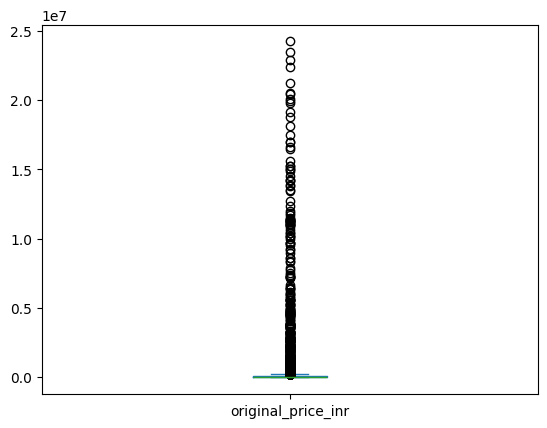

In [47]:
df['original_price_inr'].plot(kind='box')

In [48]:
df['original_price_inr'].describe()

,original_price_inr
count,9.900000e+04
mean,8.746785e+04
std,4.155105e+05
min,2.202000e+03
25%,3.107094e+04
50%,4.873308e+04
75%,1.045926e+05
max,2.423711e+07


In [49]:
Q1=df['original_price_inr'].quantile(0.25)
Q3=df['original_price_inr'].quantile(0.75)
Q3,Q1

(np.float64(104592.57), np.float64(31070.94))

In [50]:
IQR=Q3-Q1
IQR

np.float64(73521.63)

In [51]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [52]:
lower_limit,upper_limit

(np.float64(-79211.505), np.float64(214875.015))

In [53]:
df[((df['original_price_inr'] < lower_limit) | (df['original_price_inr'] > upper_limit))]

,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,discounted_price_inr,quantity,subtotal_inr,delivery_charges,final_amount_inr,customer_city,customer_state,customer_tier,customer_spending_tier,customer_age_group,payment_method,delivery_days,delivery_type,is_prime_member,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating
9,TXN_2018_00000010,2018-01-11,CUST_2018_00019500,PROD_000337,Apple iPhone XR 128GB Black,Electronics,Smartphones,Apple,234658.90,0.0,234658.90,2,469317.80,0.0,469317.80,Delhi,Delhi,Metro,Premium,26-35,Credit Card,1,Same Day,True,False,NaN,5.000000,Cancelled,1,2018,1,0.21,False,3.2
16,TXN_2018_00000017,2018-01-06,CUST_2017_00022992,PROD_000006,Apple iPhone 6 16GB Blue,Electronics,Smartphones,Apple,246998.55,0.0,246998.55,1,246998.55,0.0,246998.55,Surat,Gujarat,Tier1,Premium,26-35,COD,3,Standard,False,False,NaN,4.500000,Delivered,1,2018,1,0.17,True,3.3
21,TXN_2018_00000022,2018-01-11,CUST_2015_00000750,PROD_000015,Apple iPhone 6 Plus 16GB Blue,Electronics,Smartphones,Apple,220349.80,0.0,220349.80,1,220349.80,0.0,220349.80,Mumbai,Maharashtra,Metro,Premium,NaN,COD,7,Standard,False,False,NaN,5.000000,Delivered,1,2018,1,0.20,False,4.1
46,TXN_2018_00000047,2018-01-08,CUST_2016_00008628,PROD_000233,Apple iPhone X 32GB White,Electronics,Smartphones,Apple,221652.88,0.0,221652.88,1,221652.88,0.0,221652.88,Bengaluru,Karnataka,Metro,Premium,26-35,UPI,5,Standard,False,False,NaN,4.315538,Returned,1,2018,1,0.21,True,4.3
79,TXN_2018_00000080,2018-01-03,CUST_2018_00029779,PROD_000001,Apple iPhone 6 16GB Black,Electronics,Smartphones,Apple,224159.47,0.0,224159.47,2,448318.94,0.0,448318.94,Pune,Maharashtra,Tier1,Premium,NaN,Debit Card,2,Express,True,False,NaN,4.000000,Delivered,1,2018,1,0.21,True,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98905,TXN_2018_00098906,2018-12-24,CUST_2018_00002312,PROD_000118,Apple iPhone 7 Plus 32GB White,Electronics,Smartphones,Apple,243088.52,0.0,243088.52,1,243088.52,0.0,243088.52,Mumbai,Maharashtra,Metro,Premium,26-35,COD,2,Express,True,False,NaN,4.000000,Delivered,12,2018,4,0.19,False,4.1
98939,TXN_2018_00098940,NaT,CUST_2018_00011474,PROD_001587,ASUS Ultrabook 8GB RAM Black,Electronics,Laptops,ASUS,223657.81,0.0,223657.81,1,223657.81,0.0,223657.81,Kolkata,West Bengal,Metro,Premium,36-45,Credit Card,7,Standard,False,False,NaN,5.000000,Delivered,12,2018,4,2.24,True,3.7
98984,TXN_2018_00098985,2018-12-07,CUST_2018_00005608,PROD_000337,Apple iPhone XR 128GB Black,Electronics,Smartphones,Apple,234658.90,25.8,174107.78,2,348215.56,0.0,348215.56,Delhi,Delhi,Metro,Premium,18-25,COD,3,Standard,False,False,NaN,4.500000,Delivered,12,2018,4,0.21,False,3.2
98989,TXN_2018_00098990,NaT,CUST_2018_00011533,PROD_001997,LG 4K TV,Electronics,TV & Entertainment,LG,251527.09,0.0,251527.09,1,251527.09,0.0,251527.09,Delhi,Delhi,Metro,Premium,36-45,COD,6,Standard,False,False,NaN,5.000000,Delivered,12,2018,4,24.86,True,4.1


In [54]:
df=df[(df['original_price_inr']>=lower_limit)&(df['original_price_inr']<=upper_limit)]

In [55]:
df

,transaction_id,order_date,customer_id,product_id,product_name,category,subcategory,brand,original_price_inr,discount_percent,discounted_price_inr,quantity,subtotal_inr,delivery_charges,final_amount_inr,customer_city,customer_state,customer_tier,customer_spending_tier,customer_age_group,payment_method,delivery_days,delivery_type,is_prime_member,is_festival_sale,festival_name,customer_rating,return_status,order_month,order_year,order_quarter,product_weight_kg,is_prime_eligible,product_rating
0,TXN_2018_00000001,2018-01-28,CUST_2015_00011381,PROD_000367,Samsung Galaxy S9+ 128GB White,Electronics,Smartphones,Samsung,123828.89,0.00,123828.89,1,123828.89,0.0,123828.89,Delhi,Delhi,Metro,Premium,18-25,COD,3,Standard,False,False,NaN,4.500000,Delivered,1,2018,1,0.21,False,3.9
1,TXN_2018_00000002,2018-01-09,CUST_2018_00004073,PROD_001683,Apple Mi Pad 8GB RAM Silver,Electronics,Tablets,Apple,61478.19,0.00,61478.19,1,61478.19,NaN,61478.19,Mumbai,Maharashtra,Metro,Premium,18-25,COD,3,Standard,True,False,NaN,4.000000,Delivered,1,2018,1,0.40,True,4.5
2,TXN_2018_00000003,2018-01-06,CUST_2018_00024729,PROD_001688,Apple Slate 8GB RAM Black,Electronics,Tablets,Apple,38624.59,0.00,38624.59,2,77249.18,0.0,77249.18,Kochi,Kerala,Tier2,Standard,26-35,Debit Card,4,Standard,False,False,NaN,4.500000,Delivered,1,2018,1,0.41,True,3.2
3,TXN_2018_00000004,2018-01-20,CUST_2018_00015834,PROD_000236,Apple iPhone X 64GB Blue,Electronics,Smartphones,Apple,201630.77,47.20,106459.69,1,106459.69,0.0,106459.69,Delhi,Delhi,Metro,Premium,36-45,COD,4,Standard,False,True,Republic Day Sale,5.000000,Delivered,1,2018,1,0.25,True,4.0
4,TXN_2018_00000005,2018-01-07,CUST_2016_00001228,PROD_000163,OnePlus OnePlus 3T 16GB Black,Electronics,Smartphones,OnePlus,53961.70,0.00,53961.70,1,53961.70,NaN,53961.70,Indore,Madhya Pradesh,Tier1,Premium,18-25,COD,3,Standard,False,False,NaN,4.315538,Delivered,1,2018,1,0.16,True,4.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98995,TXN_2018_00098996,NaT,CUST_2018_00034488,PROD_000273,OnePlus OnePlus 5T 16GB White,Electronics,Smartphones,OnePlus,99824.06,0.00,99824.06,1,99824.06,0.0,99824.06,Delhi,Delhi,Metro,Premium,18-25,COD,4,Standard,False,False,NaN,4.500000,Delivered,12,2018,4,0.16,True,4.3
98996,TXN_2018_00098997,2018-12-04,CUST_2018_00035853,PROD_001677,Apple Galaxy Tab 4GB RAM Silver,Electronics,Tablets,Apple,76298.72,0.00,76298.72,1,76298.72,0.0,76298.72,Mumbai,Maharashtra,Metro,Standard,NaN,UPI,6,Standard,False,False,NaN,4.000000,Delivered,12,2018,4,0.34,True,3.8
98997,TXN_2018_00098998,2018-12-30,CUST_2018_00001867,PROD_000152,Samsung Galaxy J7 Prime 16GB Blue,Electronics,Smartphones,Samsung,32492.25,5.01,30865.52,1,30865.52,0.0,30865.52,Chennai,Tamil Nadu,Metro,Budget,26-35,UPI,4,Standard,False,False,NaN,4.000000,Returned,12,2018,4,0.16,True,3.6
98998,TXN_2018_00098999,2018-12-06,CUST_2017_00007517,PROD_000167,OnePlus OnePlus 3T 64GB White,Electronics,Smartphones,OnePlus,96344.00,19.46,77597.94,1,77597.94,0.0,77597.94,Delhi,Delhi,Metro,Standard,36-45,COD,6,Standard,False,False,NaN,4.500000,Delivered,12,2018,4,0.24,True,3.5


#Question 10
Payment methods contain inconsistent naming: 'UPI/PhonePe/GooglePay', 'Credit Card/CREDIT_CARD/CC', 'Cash on Delivery/COD/C.O.D'. Standardize payment method categories and create a clean categorical hierarchy.


In [56]:
df['payment_method'].unique()

array(['COD', 'Debit Card', 'Credit Card', 'UPI', 'Net Banking'],
      dtype=object)

In [57]:
mapping_payment_method = {
    'COD': 'Cash',
    'UPI': 'UPI',
    'Debit Card': 'Card',
    'Credit Card': 'Card',
    'Net Banking': 'Online Banking',
    'Wallet': 'Wallet',
    'BNPL': 'BNPL'
}

df['payment_method'] = df['payment_method'].replace(mapping_payment_method)

In [58]:
df['payment_method'].unique()

array(['Cash', 'Card', 'UPI', 'Online Banking'], dtype=object)

In [59]:
df.isnull().sum()

,0
transaction_id,0
order_date,9277
customer_id,0
product_id,0
product_name,0
category,0
subcategory,0
brand,0
original_price_inr,0
discount_percent,0


In [60]:
df['delivery_charges'].sample(10)

,delivery_charges
62386,0.0
12361,0.0
64393,0.0
34,0.0
51497,0.0
42078,0.0
77124,0.0
34249,NaN
57567,0.0
2135,0.0


In [61]:
df['delivery_charges'].isnull().sum()

np.int64(7734)

In [62]:
df['delivery_charges']=df['delivery_charges'].fillna(df['delivery_charges'].mean())

In [63]:
df['customer_age_group'].unique()

array(['18-25', '26-35', '36-45', '46-55', nan, '55+'], dtype=object)

In [64]:
mapping_age_group = {
    '18-25': 'Group-1',
    '26-35': 'Group-2',
    '36-45': 'Group-3',
    '46-55': 'Group-4',
    '55+':   'Group-5'
}

df['customer_age_group'] = df['customer_age_group'].replace(mapping_age_group)

In [65]:
df['customer_age_group'].unique()

array(['Group-1', 'Group-2', 'Group-3', 'Group-4', nan, 'Group-5'],
      dtype=object)

In [66]:
# df['customer_age_group'].mode()[0]
df['customer_age_group']=df['customer_age_group'].fillna(df['customer_age_group'].mode()[0])

In [67]:
df['customer_age_group'].isnull().sum()

np.int64(0)

In [68]:
df.isnull().sum()

,0
transaction_id,0
order_date,9277
customer_id,0
product_id,0
product_name,0
category,0
subcategory,0
brand,0
original_price_inr,0
discount_percent,0


In [69]:
df=df.drop(columns=['festival_name'])

In [70]:
df.isnull().sum()

,0
transaction_id,0
order_date,9277
customer_id,0
product_id,0
product_name,0
category,0
subcategory,0
brand,0
original_price_inr,0
discount_percent,0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96631 entries, 0 to 98999
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   transaction_id          96631 non-null  object        
 1   order_date              87354 non-null  datetime64[ns]
 2   customer_id             96631 non-null  object        
 3   product_id              96631 non-null  object        
 4   product_name            96631 non-null  object        
 5   category                96631 non-null  object        
 6   subcategory             96631 non-null  object        
 7   brand                   96631 non-null  object        
 8   original_price_inr      96631 non-null  float64       
 9   discount_percent        96631 non-null  float64       
 10  discounted_price_inr    96631 non-null  float64       
 11  quantity                96631 non-null  int64         
 12  subtotal_inr            96631 non-null  float64    

In [73]:
df.to_csv('cleaned_2018.csv')